In [1]:
import pandas as pd

# Load the dataset
file_path_train = "/content/drive/MyDrive/Colab Notebooks/train_waktu_pengiriman.csv"
file_path_test = "/content/drive/MyDrive/Colab Notebooks/test_waktu_pengiriman.csv"
df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

# **No. 1**
Lakukan eksplorasi terhadap dataset, serta terapkan preprocessing yang diperlukan dan tentukan fitur paling berpengaruh terhadap waktu pengiriman. Jelaskan alasan dibalik pemilihan fitur tersebut.

In [2]:
# data cleaning untuk train

from sklearn.impute import SimpleImputer

# Drop sensitive columns
df_cleaned_train = df_train.drop(columns=['Nama_Penerima', 'Alamat_Penerima', 'No_Telp_Penerima'])

# Identify categorical and numerical columns
categorical_cols = df_cleaned_train.select_dtypes(include='object').columns.tolist()
numerical_cols = df_cleaned_train.select_dtypes(exclude='object').columns.tolist()

# Impute missing values
# For categorical columns: use mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned_train[categorical_cols] = cat_imputer.fit_transform(df_cleaned_train[categorical_cols])

# For numerical columns: use median
num_imputer = SimpleImputer(strategy='median')
df_cleaned_train[numerical_cols] = num_imputer.fit_transform(df_cleaned_train[numerical_cols])

df_cleaned_train.isnull().sum()


,0
ID_Pesanan,0
Jenis_Kelamin,0
Jarak_km,0
Cuaca,0
Tingkat_Kemacetan,0
Waktu,0
Tipe_Kendaraan,0
Waktu_Persiapan_menit,0
Metode_Pembayaran,0
Tahun_Masuk,0


In [3]:
# data cleaning untuk test

# Drop sensitive columns
df_cleaned_test = df_test.drop(columns=['Nama_Penerima', 'Alamat_Penerima', 'No_Telp_Penerima'])

# Identify categorical and numerical columns
categorical_cols = df_cleaned_test.select_dtypes(include='object').columns.tolist()
numerical_cols = df_cleaned_test.select_dtypes(exclude='object').columns.tolist()

# Impute missing values
# For categorical columns: use mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned_test[categorical_cols] = cat_imputer.fit_transform(df_cleaned_test[categorical_cols])

# For numerical columns: use median
num_imputer = SimpleImputer(strategy='median')
df_cleaned_test[numerical_cols] = num_imputer.fit_transform(df_cleaned_test[numerical_cols])


df_cleaned_test.isnull().sum()

,0
ID_Pesanan,0
Jenis_Kelamin,0
Jarak_km,0
Cuaca,0
Tingkat_Kemacetan,0
Waktu,0
Tipe_Kendaraan,0
Waktu_Persiapan_menit,0
Metode_Pembayaran,0
Tahun_Masuk,0


In [4]:
# encoding untuk data train

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Label encoding
label_cols = ['Cuaca', 'Tingkat_Kemacetan', 'Waktu', 'Tipe_Kendaraan']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df_cleaned_train[col] = label_encoders[col].fit_transform(df_cleaned_train[col])

# One hot encoding
df_cleaned_train = pd.get_dummies(df_cleaned_train, columns=['Jenis_Kelamin', 'Metode_Pembayaran', 'Menggunakan_Voucher', 'Status'])

df_cleaned_train

,ID_Pesanan,Jarak_km,Cuaca,Tingkat_Kemacetan,Waktu,Tipe_Kendaraan,Waktu_Persiapan_menit,Tahun_Masuk,Total_Pesanan,Harga_Makanan,Biaya_Pengiriman,Waktu_Pengiriman_menit,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Metode_Pembayaran_Non-Tunai,Metode_Pembayaran_Tunai,Menggunakan_Voucher_Iya,Menggunakan_Voucher_Tidak,Status_Selesai
0,667.0,5.30,3,0,3,1,16.0,2020.0,3.0,50000.0,9000.0,32.0,False,True,True,False,False,True,True
1,130.0,10.46,3,0,3,1,25.0,2022.0,3.0,50000.0,7000.0,68.0,False,True,True,False,False,True,True
2,785.0,4.04,4,2,3,1,14.0,2019.0,5.0,50000.0,7000.0,39.0,False,True,True,False,False,True,True
3,153.0,3.33,3,1,3,2,24.0,2023.0,1.0,50000.0,10000.0,44.0,False,True,True,False,True,False,True
4,921.0,17.44,3,0,0,0,23.0,2025.0,1.0,50000.0,7500.0,85.0,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,98.0,8.84,3,0,1,1,26.0,2025.0,3.0,50000.0,5500.0,57.0,False,True,False,True,True,False,True
696,181.0,7.15,0,0,1,1,15.0,2022.0,4.0,50000.0,9000.0,42.0,True,False,True,False,False,True,True
697,429.0,7.34,4,0,3,1,22.0,2017.0,5.0,50000.0,6500.0,47.0,False,True,True,False,False,True,True
698,818.0,8.28,2,0,3,0,29.0,2018.0,1.0,50000.0,5000.0,58.0,True,False,True,False,True,False,True


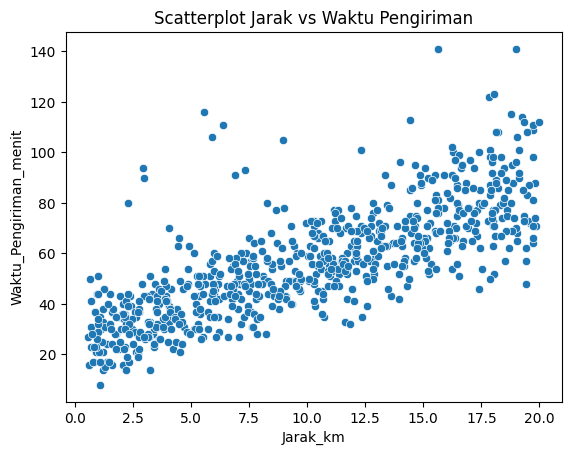

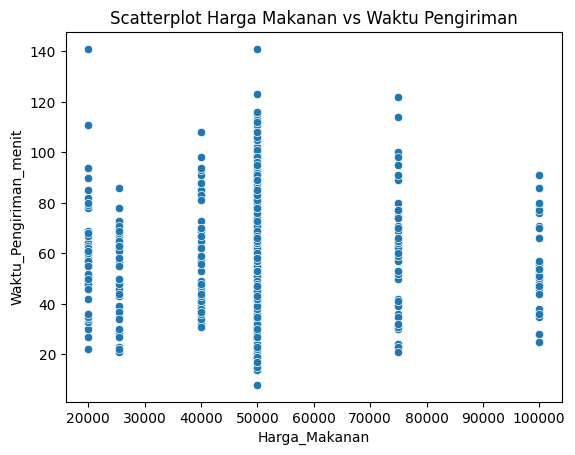

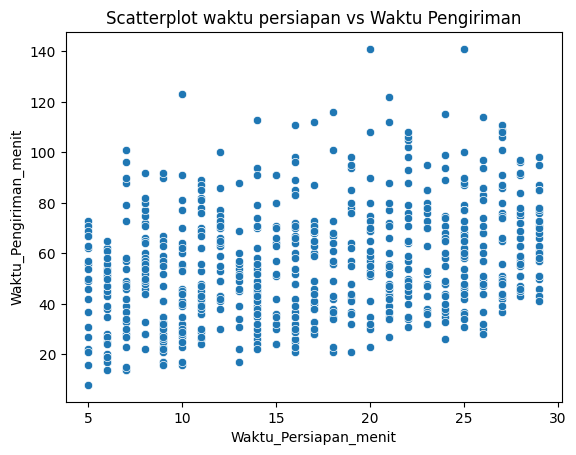

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_cleaned_train, x='Jarak_km', y='Waktu_Pengiriman_menit')
plt.title('Scatterplot Jarak vs Waktu Pengiriman')
plt.show()

sns.scatterplot(data=df_cleaned_train, x='Harga_Makanan', y='Waktu_Pengiriman_menit')
plt.title('Scatterplot Harga Makanan vs Waktu Pengiriman')
plt.show()

sns.scatterplot(data=df_cleaned_train, x='Waktu_Persiapan_menit', y='Waktu_Pengiriman_menit')
plt.title('Scatterplot waktu persiapan vs Waktu Pengiriman')
plt.show()

In [8]:
# Hitung IQR untuk target
Q1 = df_cleaned_train['Waktu_Pengiriman_menit'].quantile(0.25)
Q3 = df_cleaned_train['Waktu_Pengiriman_menit'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang termasuk outlier
df_processed_train = df_cleaned_train[(df_cleaned_train['Waktu_Pengiriman_menit'] >= lower_bound) &
                    (df_cleaned_train['Waktu_Pengiriman_menit'] <= upper_bound)]

# Tampilkan hasil
original_count = len(df_processed_train)
cleaned_count = len(df_processed_train)
removed_count = original_count - cleaned_count

original_count, cleaned_count, removed_count


(695, 695, 0)

In [9]:
# encoding data untuk data test

# Label encoding
label_cols = ['Cuaca', 'Tingkat_Kemacetan', 'Waktu', 'Tipe_Kendaraan']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df_cleaned_test[col] = label_encoders[col].fit_transform(df_cleaned_test[col])

# One hot encoding
df_cleaned_test = pd.get_dummies(df_cleaned_test, columns=['Jenis_Kelamin', 'Metode_Pembayaran', 'Menggunakan_Voucher', 'Status'])

<ipython-input-10-5f6f61be3467>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


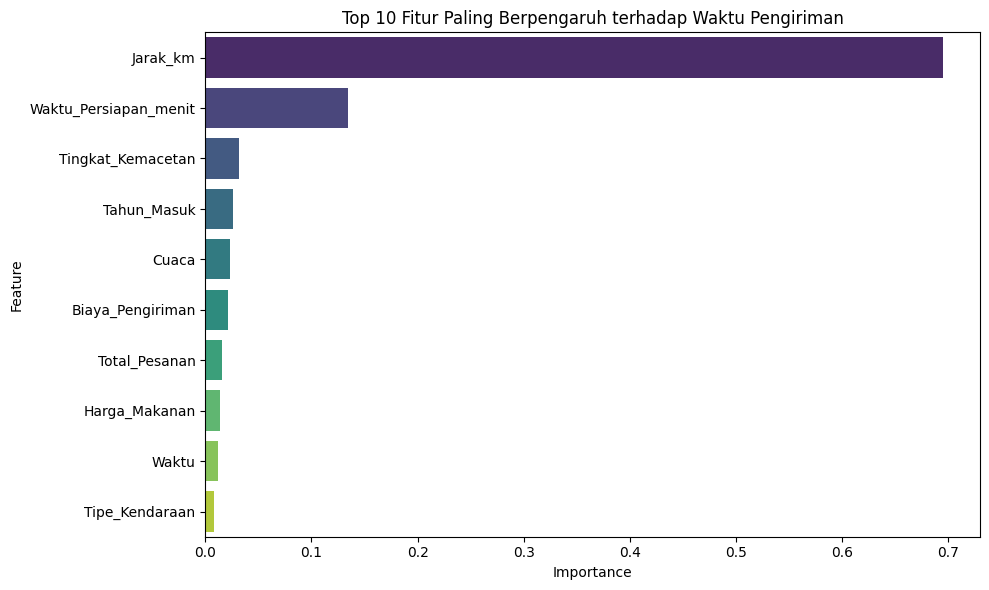

,Feature,Importance
0,Jarak_km,0.694965
5,Waktu_Persiapan_menit,0.134815
2,Tingkat_Kemacetan,0.031755
6,Tahun_Masuk,0.026133
1,Cuaca,0.022954
9,Biaya_Pengiriman,0.021801
7,Total_Pesanan,0.015304
8,Harga_Makanan,0.013631
3,Waktu,0.012051
4,Tipe_Kendaraan,0.008422


In [10]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan target
X = df_processed_train.drop(columns=['Waktu_Pengiriman_menit', 'ID_Pesanan'])
y = df_processed_train['Waktu_Pengiriman_menit']

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Ambil feature importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Fitur Paling Berpengaruh terhadap Waktu Pengiriman')
plt.tight_layout()
plt.show()

importance_df  # Menampilkan fitur paling berpengaruh secara numerik juga


berdasarkan analisis menggunakan random forest regressor terdapat 3 fitur paling berpengaruh dalam memprediksi waktu pengiriman yaitu jarak km, waktu persiapan, tingkat kemacetan

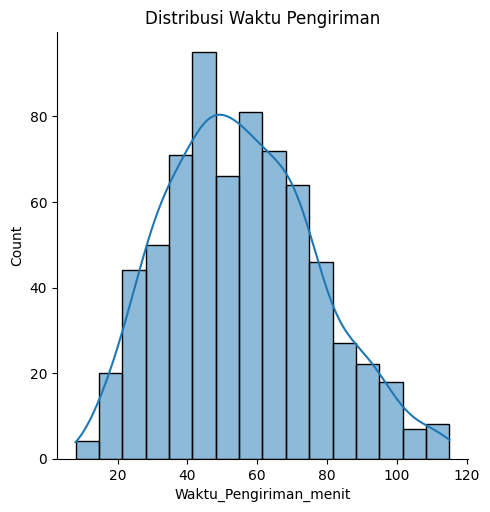

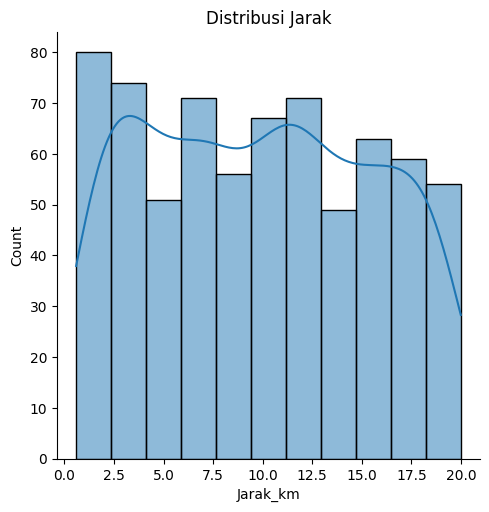

In [11]:
sns.displot(df_processed_train['Waktu_Pengiriman_menit'], kde=True)
plt.title('Distribusi Waktu Pengiriman')
plt.show()

sns.displot(df_processed_train['Jarak_km'], kde=True)
plt.title('Distribusi Jarak')
plt.show()

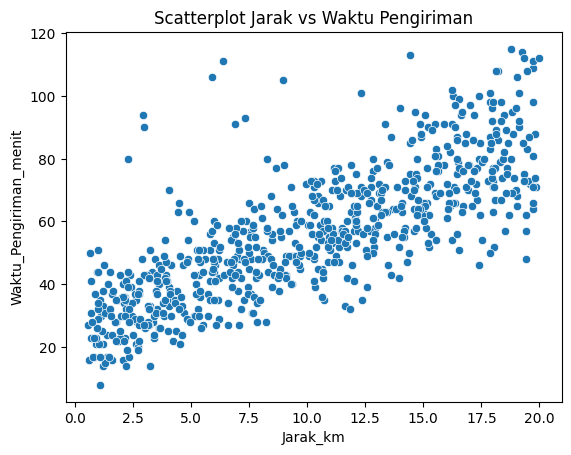

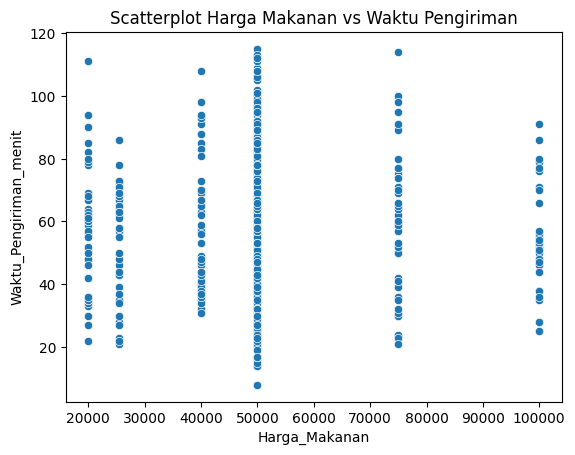

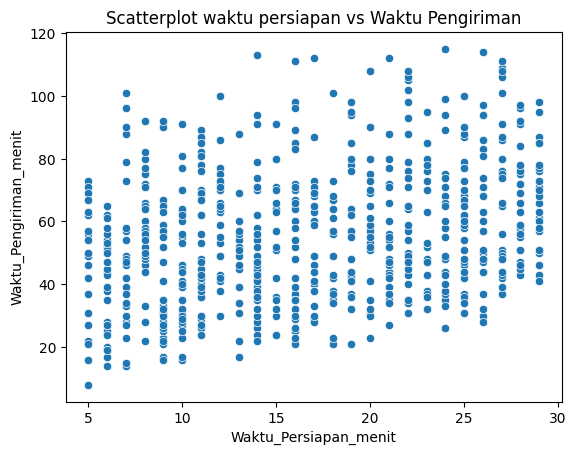

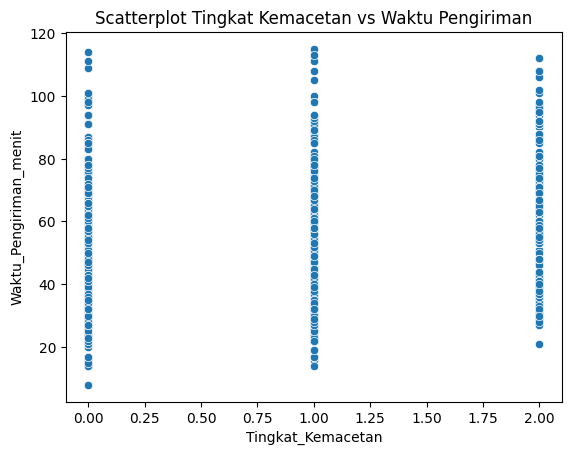

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_processed_train, x='Jarak_km', y='Waktu_Pengiriman_menit')
plt.title('Scatterplot Jarak vs Waktu Pengiriman')
plt.show()

sns.scatterplot(data=df_processed_train, x='Harga_Makanan', y='Waktu_Pengiriman_menit')
plt.title('Scatterplot Harga Makanan vs Waktu Pengiriman')
plt.show()

sns.scatterplot(data=df_processed_train, x='Waktu_Persiapan_menit', y='Waktu_Pengiriman_menit')
plt.title('Scatterplot waktu persiapan vs Waktu Pengiriman')
plt.show()

sns.scatterplot(data=df_processed_train, x='Tingkat_Kemacetan', y='Waktu_Pengiriman_menit')
plt.title('Scatterplot Tingkat Kemacetan vs Waktu Pengiriman')
plt.show()

In [13]:
!pip install optuna xgboost

In [25]:
from sklearn.model_selection import train_test_split

x = df_processed_train.drop(columns=['Waktu_Pengiriman_menit', 'ID_Pesanan', 'Harga_Makanan'])
y = df_processed_train['Waktu_Pengiriman_menit']

x_final = df_cleaned_test.drop(columns=['ID_Pesanan', 'Harga_Makanan'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
import xgboost as xgb
import optuna
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'reg:squarederror',
        'booster': 'gbtree',
        'eval_metric': 'rmse',
        'tree_method': 'auto',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    model = xgb.XGBRegressor(**param)

    model.fit(x_train, y_train,
              eval_set=[(x_test, y_test)],
              verbose=False)

    preds = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_trial.params)

best_params = study.best_trial.params
best_params['objective'] = 'reg:squarederror'
best_params['eval_metric'] = 'rmse'
best_params['verbosity'] = 0

best_model_xgb = xgb.XGBRegressor(**best_params)
best_model_xgb.fit(x_train, y_train)

y_pred_xgb_optuna = best_model_xgb.predict(x_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred_xgb_optuna)
mse = mean_squared_error(y_test, y_pred_xgb_optuna)
r2 = r2_score(y_test, y_pred_xgb_optuna)

print("Evaluasi Model xgbosst + optuna:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")


[I 2025-04-26 00:19:41,959] A new study created in memory with name: no-name-eb724d5f-afe3-4bbc-9e32-4a6059ad7637
[I 2025-04-26 00:19:48,222] Trial 0 finished with value: 10.829942793196748 and parameters: {'n_estimators': 667, 'learning_rate': 0.05803629713422654, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 4.977169326221501, 'subsample': 0.6391211600086942, 'colsample_bytree': 0.6281981065526192, 'reg_alpha': 0.26977309664765003, 'reg_lambda': 0.2201350288896703}. Best is trial 0 with value: 10.829942793196748.
[I 2025-04-26 00:19:49,127] Trial 1 finished with value: 10.586199298062429 and parameters: {'n_estimators': 497, 'learning_rate': 0.037464929637511954, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 3.7769982024195983, 'subsample': 0.8812584851718396, 'colsample_bytree': 0.5358907588714885, 'reg_alpha': 0.5528974144380074, 'reg_lambda': 0.4585933265950558}. Best is trial 1 with value: 10.586199298062429.
[I 2025-04-26 00:19:54,554] Trial 2 finished with value: 13.3680813

Best RMSE: 9.431600483994423
Best Hyperparameters: {'n_estimators': 835, 'learning_rate': 0.00772247368456479, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 3.708773248735619, 'subsample': 0.6927316924080387, 'colsample_bytree': 0.5479903894362967, 'reg_alpha': 0.3024382408558157, 'reg_lambda': 0.916591788676228}
Evaluasi Model xgbosst + optuna:
Mean Absolute Error (MAE): 6.754858277060769
Mean Squared Error (MSE): 88.95508768968384
R2 Score: 0.784863871944118


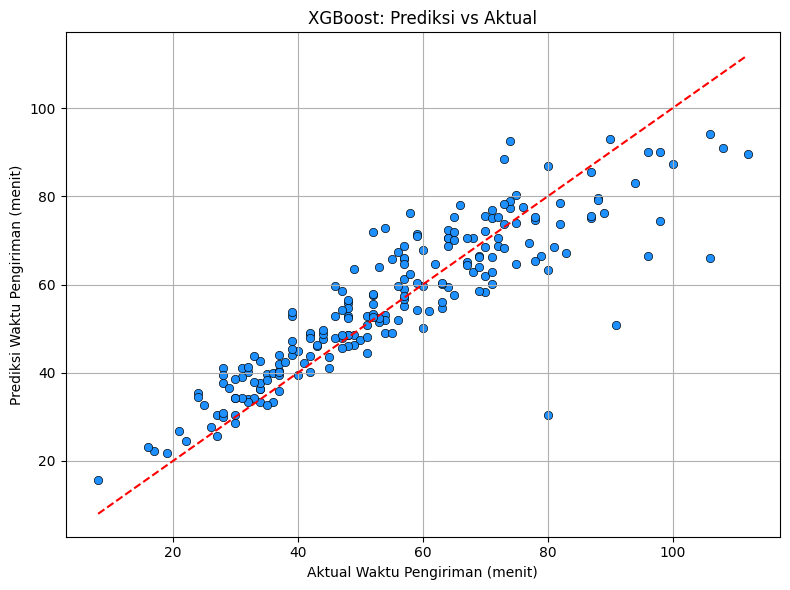

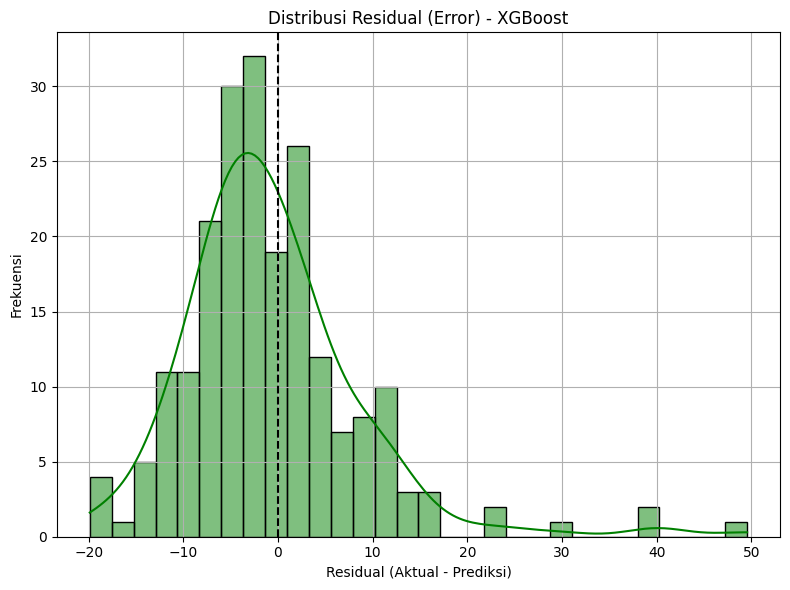

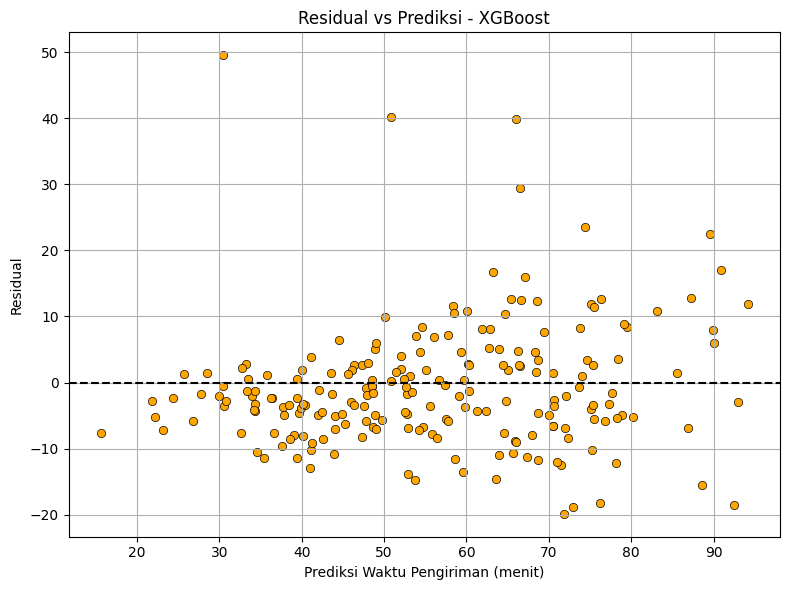

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb_optuna, color='dodgerblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Aktual Waktu Pengiriman (menit)")
plt.ylabel("Prediksi Waktu Pengiriman (menit)")
plt.title("XGBoost: Prediksi vs Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals_xgb = y_test - y_pred_xgb_optuna

plt.figure(figsize=(8, 6))
sns.histplot(residuals_xgb, bins=30, kde=True, color='green')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Residual (Aktual - Prediksi)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residual (Error) - XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_xgb_optuna, y=residuals_xgb, color='orange', edgecolor='black')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Prediksi Waktu Pengiriman (menit)")
plt.ylabel("Residual")
plt.title("Residual vs Prediksi - XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.linear_model import HuberRegressor

def objective(trial):
    params = {
        'epsilon': trial.suggest_float('epsilon', 1.0, 5.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e-1, log=True),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
    }

    model = HuberRegressor(**params)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print("Best RMSE:", study.best_value)
print("Best Params:", study.best_trial.params)

best_params = study.best_trial.params
final_huber = HuberRegressor(**best_params)
final_huber.fit(x_train, y_train)

y_pred_huber = final_huber.predict(x_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred_huber)
mse = mean_squared_error(y_test, y_pred_huber)
r2 = r2_score(y_test, y_pred_huber)

print("Evaluasi Model huber + optuna:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")


[I 2025-04-26 00:23:11,629] A new study created in memory with name: no-name-1ec3ece7-3b4c-4b3c-a12a-c2aa8333a646
[I 2025-04-26 00:23:11,696] Trial 0 finished with value: 9.735027657650845 and parameters: {'epsilon': 2.6331753382098055, 'alpha': 6.151053426684389e-05, 'max_iter': 837}. Best is trial 0 with value: 9.735027657650845.
[I 2025-04-26 00:23:11,763] Trial 1 finished with value: 9.794931946862167 and parameters: {'epsilon': 4.434606871478398, 'alpha': 0.0005764717088999515, 'max_iter': 585}. Best is trial 0 with value: 9.735027657650845.
[I 2025-04-26 00:23:11,836] Trial 2 finished with value: 9.739074900943697 and parameters: {'epsilon': 2.740302806162971, 'alpha': 0.04804387094151087, 'max_iter': 898}. Best is trial 0 with value: 9.735027657650845.
[I 2025-04-26 00:23:11,908] Trial 3 finished with value: 9.743383436118265 and parameters: {'epsilon': 2.7590775674104795, 'alpha': 5.208361138441567e-05, 'max_iter': 637}. Best is trial 0 with value: 9.735027657650845.
[I 2025-04

Best RMSE: 9.588885785908312
Best Params: {'epsilon': 1.1904206296754678, 'alpha': 0.0017476417411531574, 'max_iter': 735}
Evaluasi Model huber + optuna:
Mean Absolute Error (MAE): 6.685362368430876
Mean Squared Error (MSE): 91.94673061519448
R2 Score: 0.7776286424340833


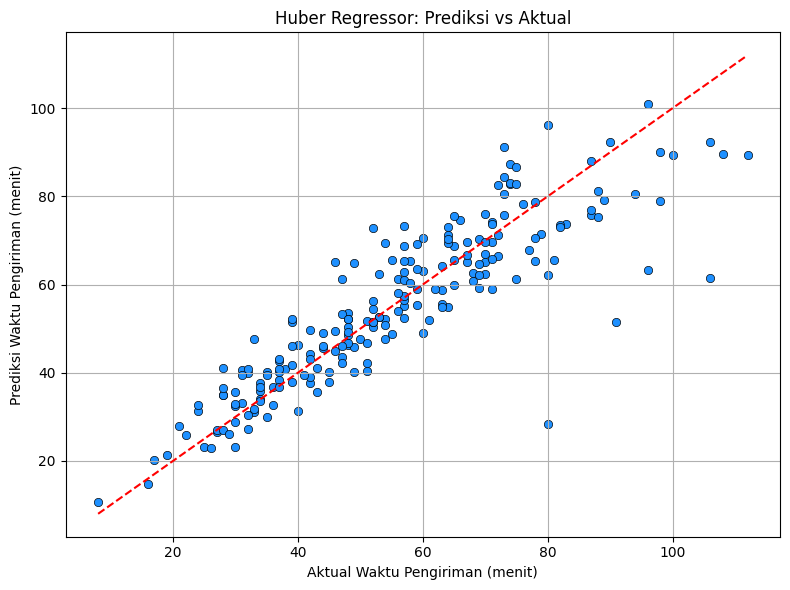

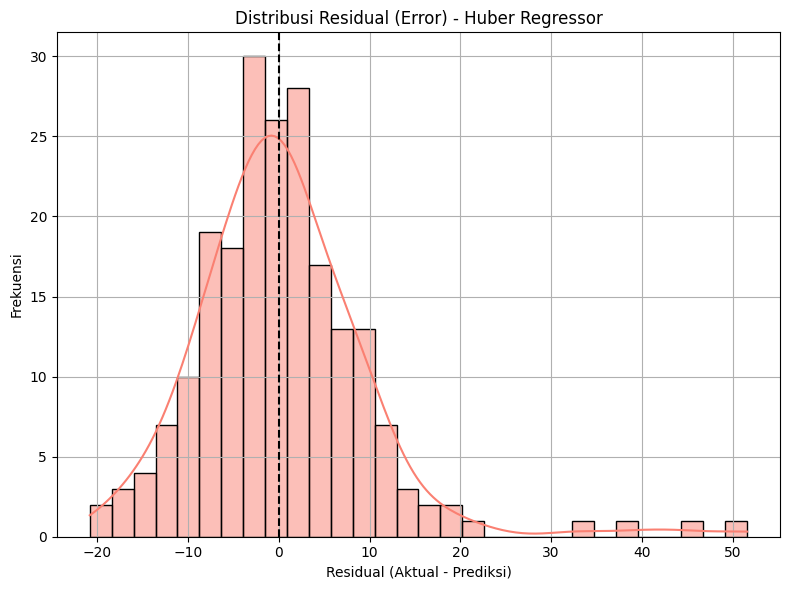

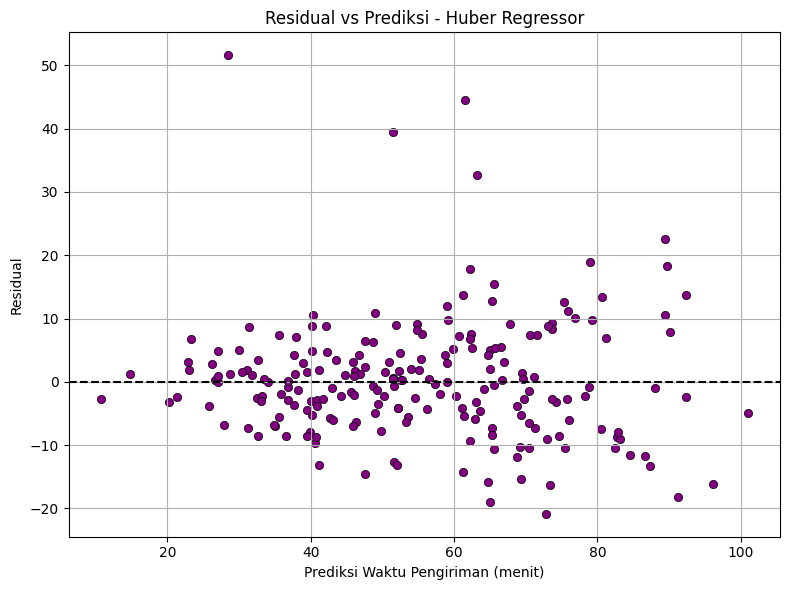

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_huber, color='dodgerblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel("Aktual Waktu Pengiriman (menit)")
plt.ylabel("Prediksi Waktu Pengiriman (menit)")
plt.title("Huber Regressor: Prediksi vs Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Hitung residual (selisih antara prediksi dan nilai aktual)
residuals = y_test - y_pred_huber

# Plot distribusi residual
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='salmon')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Residual (Aktual - Prediksi)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residual (Error) - Huber Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residual vs prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_huber, y=residuals, color='purple', edgecolor='black')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Prediksi Waktu Pengiriman (menit)")
plt.ylabel("Residual")
plt.title("Residual vs Prediksi - Huber Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
pip install optuna

In [22]:
import lightgbm as lgb
import optuna
import numpy as np

def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    # Use callbacks for early stopping
    callbacks = [lgb.early_stopping(stopping_rounds=50, verbose=False)]

    # Buat model dan validasi pakai data training
    model = lgb.LGBMRegressor(**param)
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)],
              callbacks=callbacks, eval_metric='rmse')

    preds = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

print("Best trial:")
print(f"  RMSE: {study.best_value}")
print(f"  Best params: {study.best_trial.params}")

# Model terbaik
best_params = study.best_trial.params
best_params['objective'] = 'regression'
best_params['metric'] = 'rmse'
best_params['random_state'] = 42

best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(x_train, y_train)

# Prediksi dan evaluasi
y_pred_optuna = best_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_optuna)
mse = mean_squared_error(y_test, y_pred_optuna)
r2 = r2_score(y_test, y_pred_optuna)

print("Evaluasi Model Lightbgm + Optuna :")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")



[I 2025-04-26 00:25:19,518] A new study created in memory with name: no-name-b66a7dbd-5968-45d3-af45-3d437ce24719
[I 2025-04-26 00:25:19,888] Trial 0 finished with value: 9.703774495452842 and parameters: {'n_estimators': 468, 'learning_rate': 0.03731642611731306, 'num_leaves': 71, 'max_depth': 10, 'min_child_samples': 42, 'subsample': 0.8167909038540244, 'colsample_bytree': 0.720066592038892, 'reg_alpha': 0.36360074646794993, 'reg_lambda': 0.5431056965870188}. Best is trial 0 with value: 9.703774495452842.
[I 2025-04-26 00:25:20,050] Trial 1 finished with value: 9.9976690165461 and parameters: {'n_estimators': 509, 'learning_rate': 0.07350670248993682, 'num_leaves': 87, 'max_depth': 11, 'min_child_samples': 23, 'subsample': 0.6848241434882305, 'colsample_bytree': 0.7202481192722145, 'reg_alpha': 0.8726132710671499, 'reg_lambda': 0.138122185354961}. Best is trial 0 with value: 9.703774495452842.
[I 2025-04-26 00:25:20,172] Trial 2 finished with value: 9.876555298963781 and parameters: 

Best trial:
  RMSE: 9.55496087443094
  Best params: {'n_estimators': 330, 'learning_rate': 0.15720142055768388, 'num_leaves': 41, 'max_depth': 13, 'min_child_samples': 44, 'subsample': 0.7377812936743026, 'colsample_bytree': 0.6211970131128647, 'reg_alpha': 0.0018762885027062831, 'reg_lambda': 0.2409838402209204}
Evaluasi Model Lightbgm + Optuna :
Mean Absolute Error (MAE): 7.6847356988876205
Mean Squared Error (MSE): 108.25011704281813
R2 Score: 0.7381992233718104


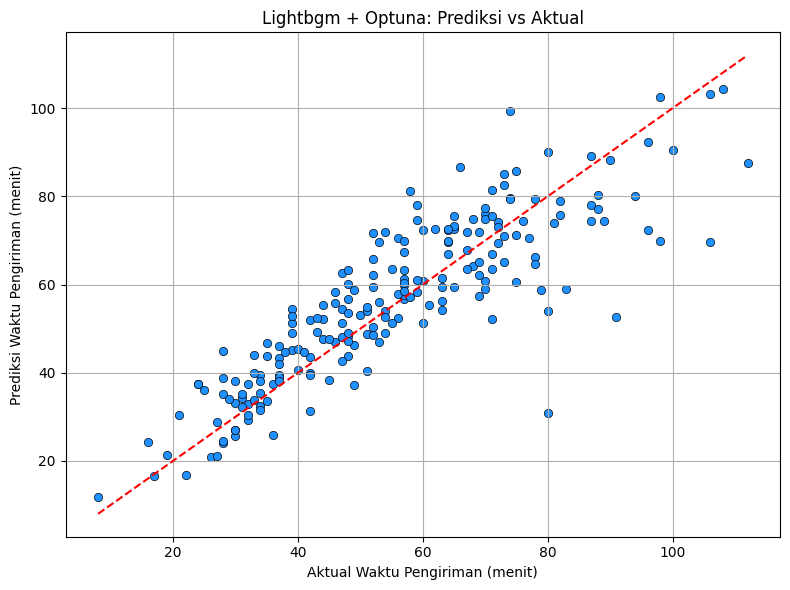

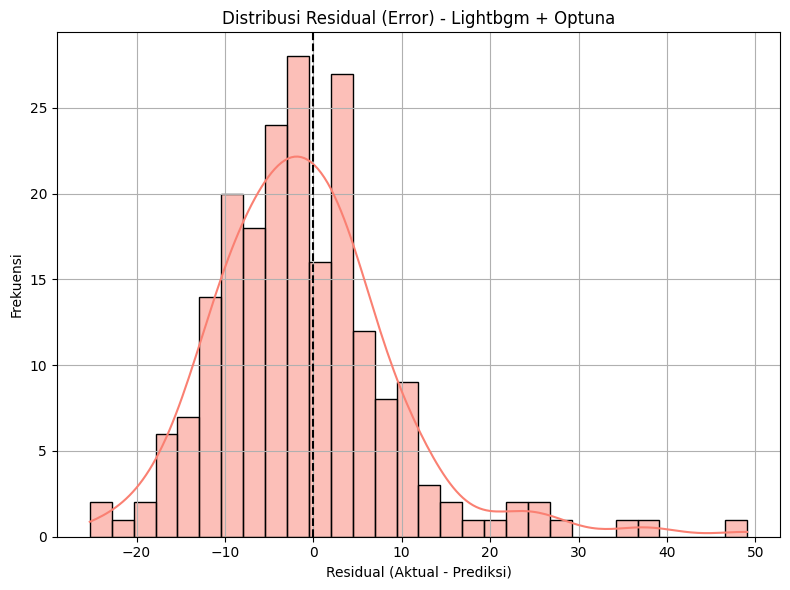

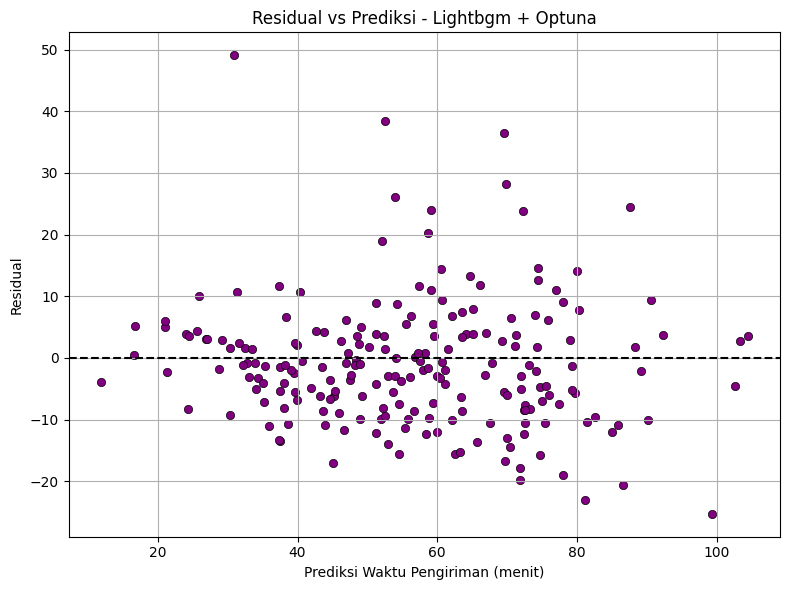

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_optuna, color='dodgerblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel("Aktual Waktu Pengiriman (menit)")
plt.ylabel("Prediksi Waktu Pengiriman (menit)")
plt.title("Lightbgm + Optuna: Prediksi vs Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Hitung residual (selisih antara prediksi dan nilai aktual)
residuals = y_test - y_pred_optuna

# Plot distribusi residual
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='salmon')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Residual (Aktual - Prediksi)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residual (Error) - Lightbgm + Optuna")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residual vs prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_optuna, y=residuals, color='purple', edgecolor='black')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Prediksi Waktu Pengiriman (menit)")
plt.ylabel("Residual")
plt.title("Residual vs Prediksi - Lightbgm + Optuna")
plt.grid(True)
plt.tight_layout()
plt.show()

drop harga_makanan

pake robust regression

pake hyperparameter + optuna

- lightbgm
- xgboost (terbaik)

In [29]:
final_model = xgb.XGBRegressor(
    n_estimators=835,
    learning_rate=0.00772247368456479,
    max_depth=3,
    min_child_weight=5,
    gamma=3.708773248735619,
    subsample=0.6927316924080387,
    colsample_bytree=0.5479903894362967,
    reg_alpha=0.3024382408558157,
    reg_lambda=0.916591788676228,
    random_state=42,
    n_jobs=-1
)

final_model.fit(x, y)

final_pred = final_model.predict(x_final)

print(final_pred)

[50.449097 44.86967  39.887318 26.886192 68.13252  43.57712  47.5306
 83.21148  41.031662 30.090248 51.286324 83.750725 33.63728  54.128506
 34.85996  62.67895  59.560993 33.35917  25.953917 64.33328  63.215225
 77.57301  71.197876 96.10648  52.316715 64.31946  56.94462  58.396336
 73.71777  40.885654 77.5012   50.511864 39.40037  72.87642  56.631443
 78.30752  40.732067 34.146084 27.907925 42.513557 46.907196 94.02604
 34.465275 31.865955 78.47971  53.706657 89.97688  60.91062  51.241898
 80.75272  38.549877 47.71175  64.47889  44.690514 63.96984  38.388103
 48.606266 38.765152 86.16104  80.52759  28.588129 70.035904 73.908844
 96.50085  31.860176 60.818787 68.41832  41.903038 61.796566 69.39316
 24.836151 57.91215  81.606895 77.772194 70.36614  73.69711  37.35283
 35.943016 48.43678  60.828445 52.56522  25.736814 87.1435   44.727127
 60.596428 43.142754 48.050297 60.156948 42.332214 59.42858  81.836395
 68.28615  25.009459 35.47306  63.245323 84.77591  44.14667  63.56192
 59.919746 4

In [30]:
# Assign predictions to a new column in the DataFrame
df_cleaned_test['Waktu_Pengiriman_menit'] = final_pred
df_cleaned_test['ID_Pesanan'] = df_cleaned_test['ID_Pesanan'].astype('int64')

# Save the updated DataFrame
df_hasil = df_cleaned_test[['ID_Pesanan', 'Waktu_Pengiriman_menit']]
df_cleaned_test.info()

df_hasil.to_csv('submission.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Pesanan                   300 non-null    int64  
 1   Jarak_km                     300 non-null    float64
 2   Cuaca                        300 non-null    int64  
 3   Tingkat_Kemacetan            300 non-null    int64  
 4   Waktu                        300 non-null    int64  
 5   Tipe_Kendaraan               300 non-null    int64  
 6   Waktu_Persiapan_menit        300 non-null    float64
 7   Tahun_Masuk                  300 non-null    float64
 8   Total_Pesanan                300 non-null    float64
 9   Harga_Makanan                300 non-null    float64
 10  Biaya_Pengiriman             300 non-null    float64
 11  Jenis_Kelamin_Laki-laki      300 non-null    bool   
 12  Jenis_Kelamin_Perempuan      300 non-null    bool   
 13  Metode_Pembayaran_No